In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/DELL/Downloads/exercise.csv')

In [3]:
testdata = pd.read_csv('C:/Users/DELL/Downloads/calories.csv')

In [4]:
#dataset used for predicting
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
#target dataset
testdata

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [6]:
#Dropping un-important Column
data = data.drop('User_ID', axis = 1)
testdata = testdata.drop('User_ID', axis = 1)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5


In [8]:
#Getting Null values for columns used in predicting
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [9]:
#Getting Null values for target column
testdata.isnull().sum()

Calories    0
dtype: int64

In [10]:
#Checking data types
data.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

In [11]:
#Cleaning Dateset
data.rename({'Duration':'Duration(minutes)','Duration':'Duration(minutes)'}, axis = 1, inplace = True)
data.rename({'Height':'Height(inches)','Height':'Height(inches)'}, axis = 1, inplace = True)
data.rename({'Body_Temp':'Body_Temp(o)','Body_Temp':'Body_Temp(o)'}, axis = 1, inplace = True)
data.rename({'Weight':'Weight(grams)','Weight':'Weight(grams)'}, axis = 1, inplace = True)

In [12]:
data

,Gender,Age,Height(inches),Weight(grams),Duration(minutes),Heart_Rate,Body_Temp(o)
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4
14996,female,27,165.0,65.0,6.0,85.0,39.2
14997,female,43,159.0,58.0,16.0,90.0,40.1
14998,male,78,193.0,97.0,2.0,84.0,38.3


In [13]:
#Splitting into X and y datsets for training and testing
X = data
y = testdata

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [15]:
#Splitting data into categorical and numerical for fitting into pipeline
categorical_data = ['Gender']

numerical_data = ['Age', 'Height(inches)', 'Weight(grams)', 'Duration(minutes)', 'Heart_Rate','Body_Temp(o)']

In [16]:
#Creating Pipeline for Numerical and Categorical Dataset above
numerical_pipe = Pipeline(steps =[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

categorical_pipe = Pipeline(steps = [('OneHot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))])

In [17]:
#Transformstion of dataset into pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_pipe, numerical_data),
                ('cat', categorical_pipe, categorical_data)],
remainder = 'drop')

In [18]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height(inches)', 'Weight(grams)',
                                  'Duration(minutes)', 'Heart_Rate',
                                  'Body_Temp(o)']),
                                ('cat',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender'])])

In [19]:
#fit Xtrain and test data into pipeline, under a new compact dataframe : preprocessed
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [20]:
                                                    #HYPERPARAMETER TUNING WITH RANDOMIZED CV

#Create a hyperparameter grid for LinearRegression
lin_reg = LinearRegression()
# after seeing the lineaqr regressions parameter and conduction research decided to just apply the model as is

#Crearte a hyperparameter grid for RandomForestRegressor
ran_for_reg = {
    'n_estimators': np.arange(100, 200, 10), 
    'max_depth': (None, 2, 10, 20),          
    'min_samples_leaf': [1, 2, 4]            
}

#Create a hyperparameter grid for GradientBoostingRegressor
grad_reg = {
    'n_estimators': np.arange(10, 500, 50),
    'learning_rate': [0.1, 0.01, 0.001],
}

In [21]:
#what the numpy range function does is create range between first and second digit using the last digit no apart i.e range between 10 to 500 using 50 numbers apart
np.arange(10, 500, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
#set up random seeds so our results are reproducible
np.random.seed(40)

In [24]:
#Set random Hyperparamter search for RandomForestRegressor

rs_rand_reg = RandomizedSearchCV(RandomForestRegressor(),                   
                                 param_distributions =  ran_for_reg,        
                                 cv = 5,                                   
                                 n_iter=10,
                                 verbose = True
)

#Fit randomized hyperparameter search model for RandomForestRegressor into preprocessed X train, and y train
rs_rand_reg.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': (None, 2, 10, 20),
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [25]:
#getting the best parameters for random forest regressor to use in the model
rs_rand_reg.best_params_

{'n_estimators': 160, 'min_samples_leaf': 1, 'max_depth': None}

In [26]:
rs_rand_reg.score(X_test_preprocessed, y_test)

0.9980819172696308

In [27]:
#fitting training model sets into Linear Regression
lin_reg.fit(X_train_preprocessed, y_train)

LinearRegression()

In [28]:
#Evaluating LinearRegression Model with the Dataset
lin_reg.score(X_test_preprocessed, y_test)

0.9644330403470736

In [29]:
#Set random Hyperparamter search for GradientBoostingRegressor

gr_boost_reg = RandomizedSearchCV(GradientBoostingRegressor(),
                                 param_distributions =  grad_reg,
                                 cv = 5,
                                 n_iter=10,
                                 verbose = True
)

#Fit randomized hyperparameter search model for GradientBoostingRegressor into preprocessed X train, and y train
gr_boost_reg.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   verbose=True)

In [30]:
#getting the best parameters for Gradient Boosting regressor to use in the model
gr_boost_reg.best_params_

{'n_estimators': 410, 'learning_rate': 0.1}

In [31]:
#Getting Model prediction Score
gr_boost_reg.score(X_test_preprocessed, y_test)

0.9988511319163375

In [32]:
#Overall, the best working model with the Calories prediction Dataset is the GradientBoosting Regressor

PERFORMING EDA(EXPLORATORY DATA ANALYSIS) TO GET MORE INSIGHT USING DATA 

<Axes: xlabel='Heart_Rate', ylabel='Duration(minutes)'>

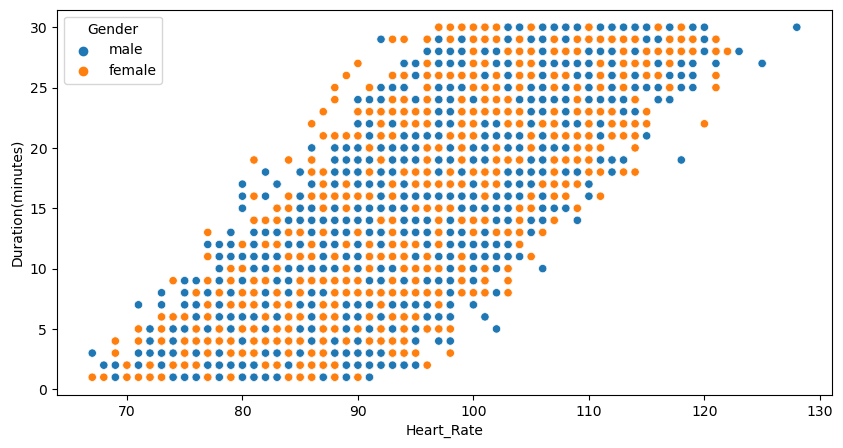

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x = 'Heart_Rate', y = 'Duration(minutes)',hue = 'Gender', palette = 'tab10')

<Axes: xlabel='Heart_Rate', ylabel='Body_Temp(o)'>

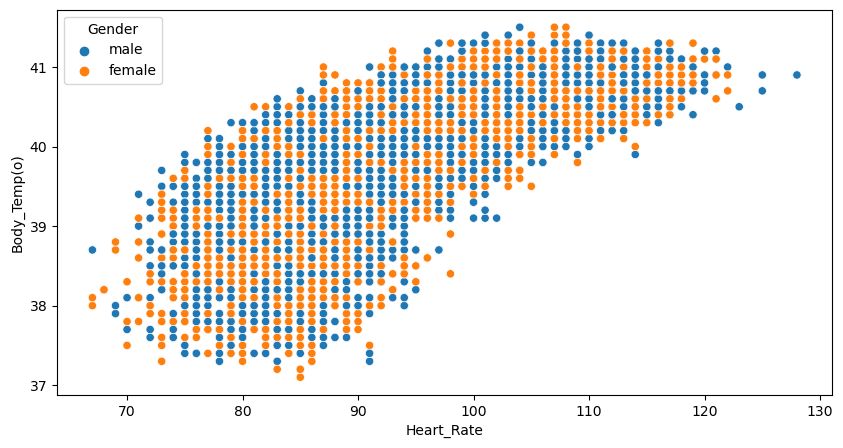

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x = 'Heart_Rate', y = 'Body_Temp(o)',hue = 'Gender', palette = 'tab10')

<Axes: xlabel='Age', ylabel='Duration(minutes)'>

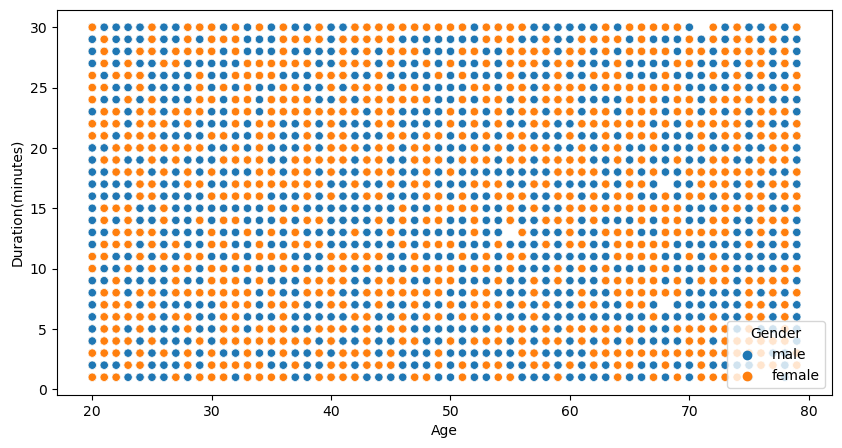

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x = 'Age', y = 'Duration(minutes)',hue = 'Gender', palette = 'tab10')

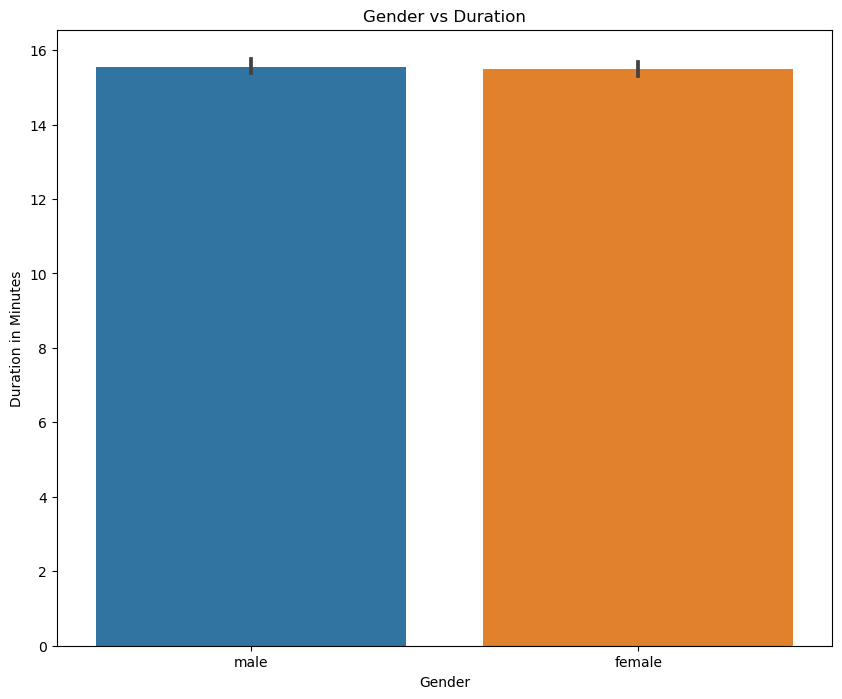

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender', y='Duration(minutes)', data=data)
plt.xlabel('Gender')
plt.ylabel('Duration in Minutes')
plt.title("Gender vs Duration")
plt.show()

After Exploratory data analysis, from the data above it is safe to say there are no unique or Conflicting patterns observed in the dataset,
Ratio betwen men, women and exercise duration appears balanced, 
as well as within various Age and Exercise Duration  